In [1]:
# 32 s
submit = True
if submit:
    LAST_TRAINSET_TIME = 32
else: 
    LAST_TRAINSET_TIME = 29

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
totalstart = time()

In [2]:
items = pd.read_csv('data/items.csv')
items.head(3)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40


In [3]:
pd.read_csv('data/item_categories.csv').head(3)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2


In [4]:
pd.read_csv('data/shops.csv').head(3)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2


In [5]:
data = pd.read_csv('data/sales_train_v2.csv')
#data['date'] = data['date'].apply(pd.to_datetime, format='%d.%m.%Y')

In [6]:
print(len(data))
print(data.describe())
data.head()

2935849
       date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00
75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00
max      3.300000e+01  5.900000e+01  2.216900e+04  3.079800e+05  2.169000e+03


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
test = pd.read_csv('data/test.csv')
print(test.describe())
test.head()

                  ID        shop_id        item_id
count  214200.000000  214200.000000  214200.000000
mean   107099.500000      31.642857   11019.398627
std     61834.358168      17.561933    6252.644590
min         0.000000       2.000000      30.000000
25%     53549.750000      16.000000    5381.500000
50%    107099.500000      34.500000   11203.000000
75%    160649.250000      47.000000   16071.500000
max    214199.000000      59.000000   22167.000000


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [8]:
print('Shop IDs in train')
print(sorted(data['shop_id'].unique()))
print('Missing shop IDs from train:')
print(sorted(set(range(60)) - set(data['shop_id'])))

print('Shop IDs in test')
print(sorted(test['shop_id'].unique()))
print('Missing shop IDs from test:')
print(sorted(set(range(60)) - set(test['shop_id'])))

#duplicate pairs are 0-57, 1-58, and 10-11
#therefore the replace values should be 57, 58, 10

Shop IDs in train
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
Missing shop IDs from train:
[]
Shop IDs in test
[2, 3, 4, 5, 6, 7, 10, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25, 26, 28, 31, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49, 50, 52, 53, 55, 56, 57, 58, 59]
Missing shop IDs from test:
[0, 1, 8, 9, 11, 13, 17, 20, 23, 27, 29, 30, 32, 33, 40, 43, 51, 54]


In [9]:
print('Missing item IDs from train:')
print(len(sorted(set(items['item_id']) - set(data['item_id']))))

print('Missing item IDs from test:')
print(len(sorted(set(items['item_id']) - set(test['item_id']))))

print('New item IDs in train:')
print(len(sorted(set(data['item_id']) - set(items['item_id']))))

print('New item IDs in test:')
print(len(sorted(set(test['item_id']) - set(items['item_id']))))

print('Item IDs in test but not in train:')
print(len(sorted(set(test['item_id']) - set(data['item_id']))))

Missing item IDs from train:
363
Missing item IDs from test:
17070
New item IDs in train:
0
New item IDs in test:
0
Item IDs in test but not in train:
363


In [10]:
data['revenue'] = data['item_cnt_day'] * data['item_price']

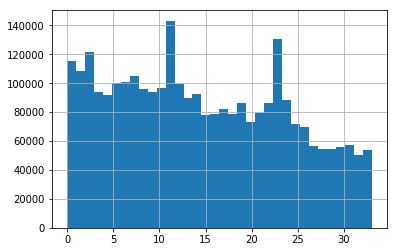

In [11]:
data['date_block_num'].hist(bins=len(data['date_block_num'].unique()))

In [12]:
# Якутск Орджоникидзе, 56
data.loc[data.shop_id == 0, 'shop_id'] = 57
# Якутск ТЦ "Центральный"
data.loc[data.shop_id == 1, 'shop_id'] = 58
# Жуковский ул. Чкалова 39м²
data.loc[data.shop_id == 11, 'shop_id'] = 10

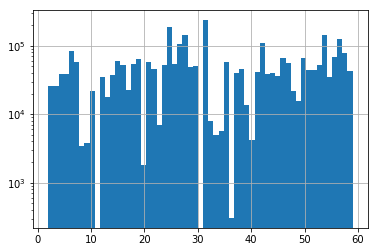

In [13]:
data['shop_id'].hist(bins=59)
plt.yscale('log')

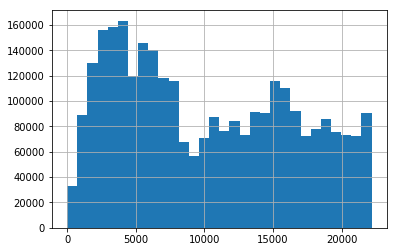

In [14]:
data['item_id'].hist(bins=30)

1


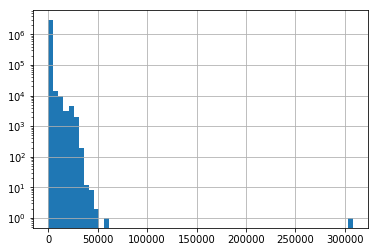

In [15]:
print(len(data[data['item_price'] <= 0]))
data['item_price'].hist(bins=60)
#plt.xscale('log')
plt.yscale('log')
plt.show()

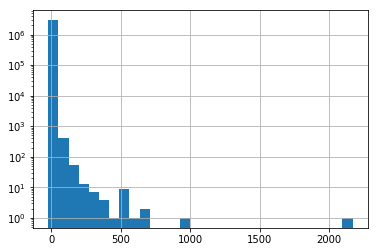

In [16]:
data = data[data['item_price'] > 0]
data = data[data['item_price'] < 100000]
data['item_cnt_day'].hist(bins=30)
plt.yscale('log')

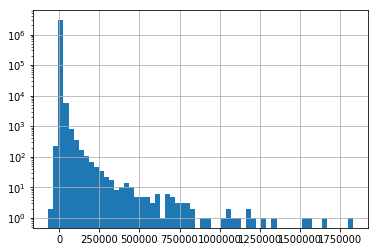

In [17]:
data = data[data['item_cnt_day'] < 1500]
data['revenue'].hist(bins=60)
plt.yscale('log')

In [18]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [19]:
def remove_inf(x):
    if x==np.inf:
        return 0 
    else: 
        return x

returns = data[['item_id', 'item_cnt_day', 'date_block_num']]
returns = returns[returns['date_block_num'] <= LAST_TRAINSET_TIME]

returns['returns'] = [-x if x < 0 else 0 for x in returns['item_cnt_day']]
returns['item_cnt_day'] = [x if x > 0 else 0 for x in returns['item_cnt_day']]
returns = returns.groupby(by=['item_id']).aggregate({'item_cnt_day': np.sum, 'returns': np.sum}).reset_index()

returns['item_return_percent'] = returns['returns'] / returns['item_cnt_day']
returns['item_return_percent'] = returns['item_return_percent'].apply(remove_inf).clip(0,1) # np /0=inf; one ocurrence with ~400%
returns = returns[['item_id', 'item_return_percent']]
returns.head(10)

,item_id,item_return_percent
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0


In [20]:
items = pd.merge(left=items, right=returns, how='left', on='item_id')

In [21]:
print(len(data))
np.sum(data.isnull().any(axis=1))

2935846


0

In [22]:
data = pd.merge(left=data, right=items[['item_id', 'item_category_id', 'item_return_percent']], how='inner', on='item_id')
monthly = data.groupby(by=['date_block_num', 'shop_id', 'item_id']
                      ).aggregate({'item_cnt_day': np.sum, 'item_price': np.mean, 'revenue': np.sum, 
                                   'item_category_id': np.mean, 'item_return_percent': np.mean}).reset_index()

monthly = monthly.rename(columns={'date_block_num': 'time', 'shop_id': 'shop', 'item_id': 'item', 
                                  'item_price': 'price', 'item_category_id': 'category', 'item_cnt_day': 'count'})
monthly['count'] = monthly['count'].clip(0,20) # This is also done to the hidden test set
monthly = monthly.astype({'count': 'int64'})
monthly.head()

,time,shop,item,count,price,revenue,category,item_return_percent
0,0,2,27,1,2499.0,2499.0,19,0.000000
1,0,2,33,1,499.0,499.0,37,0.004854
2,0,2,317,1,299.0,299.0,45,0.000000
3,0,2,438,1,299.0,299.0,45,0.000000
4,0,2,471,2,399.0,798.0,49,0.000000


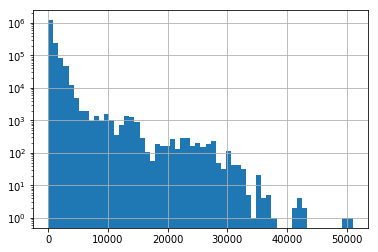

In [23]:
monthly['price'].hist(bins=60)
plt.yscale('log')

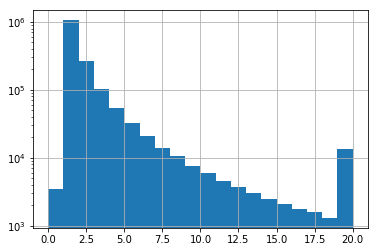

In [24]:
monthly['count'].hist(bins=20)
plt.yscale('log')

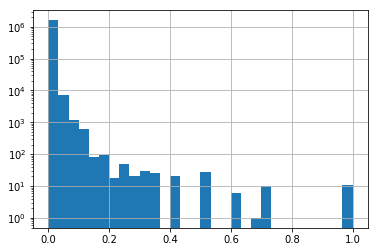

In [25]:
monthly['item_return_percent'].hist(bins=30)
plt.yscale('log')

In [26]:
if submit:
    monthly.to_csv('data/monthly_submit.csv', index=False)
else: 
    monthly.to_csv('data/monthly_develop.csv', index=False)

In [27]:
len(monthly)

1609123

In [28]:
_5037 = monthly[monthly['item'] == 5037]
_5037.head()

,time,shop,item,count,price,revenue,category,item_return_percent
1067735,20,3,5037,6,2599.0,15594.0,19,0.006385
1068244,20,4,5037,1,2599.0,2599.0,19,0.006385
1068807,20,5,5037,1,2599.0,2599.0,19,0.006385
1069626,20,6,5037,6,2599.0,15594.0,19,0.006385
1070677,20,7,5037,4,2599.0,10396.0,19,0.006385


         time  shop  item  count   price  revenue  category  \
1068807    20     5  5037      1  2599.0   2599.0        19   
1152032    22     5  5037      1  2599.0   2599.0        19   
1198522    23     5  5037      2  1999.0   3998.0        19   
1257192    24     5  5037      2  1999.0   3998.0        19   
1418299    28     5  5037      1  1299.0   1299.0        19   

         item_return_percent  
1068807             0.006385  
1152032             0.006385  
1198522             0.006385  
1257192             0.006385  
1418299             0.006385  


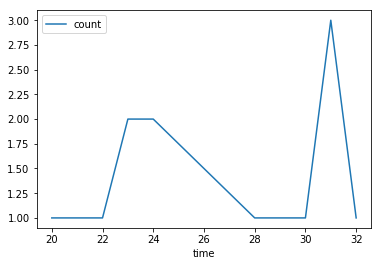

In [29]:
_5037_5 = _5037[_5037['shop'] == 5]
print(_5037_5.head())
_5037_5.plot(x='time', y='count')

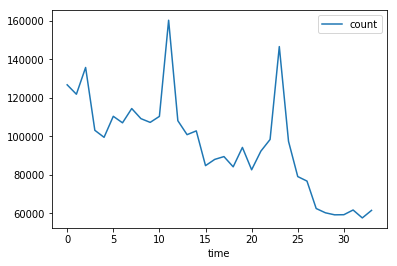

In [30]:
counts = monthly.groupby('time').aggregate({'count': np.sum})
counts.plot()

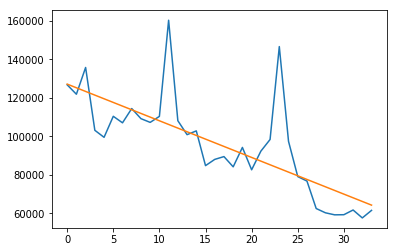

In [31]:
linear, constant = np.polyfit(counts.index, counts['count'], deg=1)
plt.plot(counts)
plt.plot(range(0, 34), [x*linear + constant for x in range(0, 34)])
plt.show()

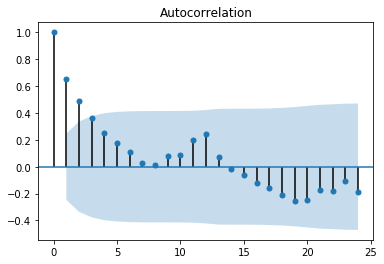

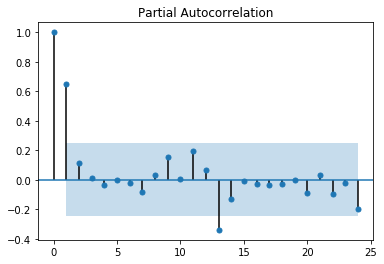

In [32]:
plot_acf(counts, lags=24, alpha=0.15)
plot_pacf(counts, lags=24, alpha=0.15, method='ywm')
plt.show()

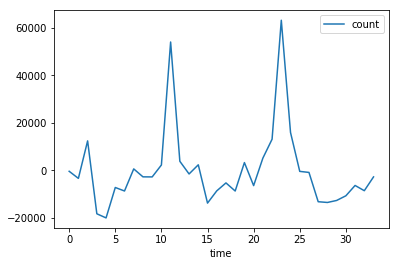

In [33]:
adjusted = counts.copy() # trend adjusted
adjusted['count'] = [adjusted['count'][x] - (x*linear + constant) for x in range(0, 34)]
adjusted.plot()

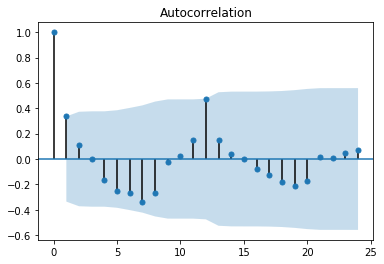

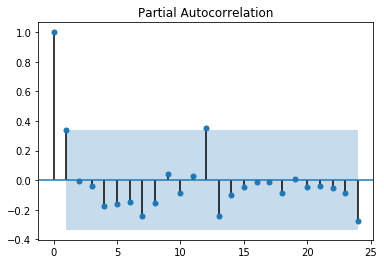

In [34]:
plot_acf(adjusted, lags=24, alpha=0.05)
plot_pacf(adjusted, lags=24, alpha=0.05, method='ywm')
plt.show()

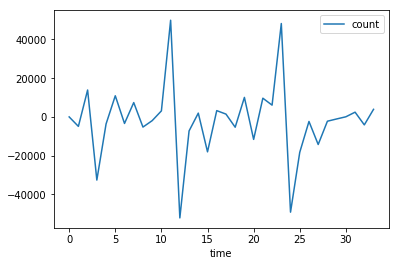

In [35]:
diffs = counts.diff()
diffs['count'][0] = 0
diffs.plot()

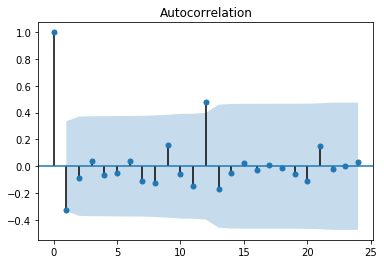

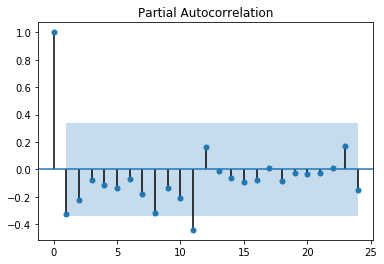

In [36]:
plot_acf(diffs, lags=24, alpha=0.05)
plot_pacf(diffs, lags=24, alpha=0.05, method='ywm')
plt.show()

In [37]:
print('total time:', round(time()-totalstart, 1), 's')

total time: 58.5 s
